In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels

In [44]:
csv1 = pd.read_csv("DESY_MDwarfs_Crossmatch.csv")
csv2 = pd.read_csv("JOHNSTON_MDwarfs_Crossmatch.csv")

csv3 = pd.read_csv("DESY_NotMDwarfs_Crossmatch.csv")
csv4 = pd.read_csv("JOHNSTON_NotMDwarfs_Crossmatch.csv")

csv1['source'] = 'M' #M dwarfs
csv2['source'] = 'M'
csv3['source'] = 'B' #Brown dwarfs, mostly of type L and T
csv4['source'] = 'B'

dfM = csv2 #pd.concat([csv1, csv2], ignore_index=True)
dfB = csv4 #pd.concat([csv3, csv4], ignore_index=True)

In [45]:
#print(combo_M)
#print(combo_B)

print(len(dfM))
print(len(dfB))

columns_to_clean = ['phot_g_mean_flux', 'phot_bp_mean_flux','phot_rp_mean_flux', 'phot_bp_rp_excess_factor', 
                   'bp_rp','phot_g_mean_flux_error', 'phot_bp_mean_flux_error', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 
                   'phot_g_mean_mag_error', 'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error',
                   'phot_g_mean_mag_corrected', 'phot_g_mean_mag_error_corrected', 'phot_g_mean_flux_corrected', 'phot_bp_rp_excess_factor_corrected']

dfM[columns_to_clean] = dfM[columns_to_clean].apply(pd.to_numeric, errors='coerce')
strx = dfM[columns_to_clean]
nan_count = strx.isnull().sum()

#print(nan_count[nan_count > 0])
#print(np.max(nan_count) / len(NaNx))

NaNx_cleanM = strx.dropna()
notm_indices = NaNx_cleanM.index.tolist()
print(len(NaNx_cleanM))

dfB[columns_to_clean] = dfB[columns_to_clean].apply(pd.to_numeric, errors='coerce')
strx = dfB[columns_to_clean]
nan_count = strx.isnull().sum()

#print(nan_count[nan_count > 0])
#print(np.max(nan_count) / len(NaNx))

NaNx_cleanB = strx.dropna()
notb_indices = NaNx_cleanB.index.tolist()
print(len(NaNx_cleanB))

597
1100
573
1045


In [46]:
XM = NaNx_cleanM
ym = dfM['SPEC'][notm_indices]

XB = NaNx_cleanB
yb = dfB['SPEC'][notb_indices]

X_train_M, X_test_M, y_train_m, y_test_m = train_test_split(XM, ym, test_size=0.2, random_state=42)

X_train_B, X_test_B, y_train_b, y_test_b = train_test_split(XB, yb, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #Kneighbors

X_scaled_M = scaler.fit_transform(XM) #Scaling
X_train_M, X_test_M, y_train_m, y_test_m = train_test_split(X_scaled_M, ym, test_size=0.2, random_state=42)
knn.fit(X_train_M, y_train_m) #Using Kneighbors
y_pred_m = knn.predict(X_test_M) #Predictions

X_scaled_B = scaler.fit_transform(XB) #Scaling
X_train_B, X_test_B, y_train_b, y_test_b = train_test_split(X_scaled_B, yb, test_size=0.2, random_state=42)
knn.fit(X_train_B, y_train_b) #Using Kneighbors
y_pred_b = knn.predict(X_test_B) #Predictions

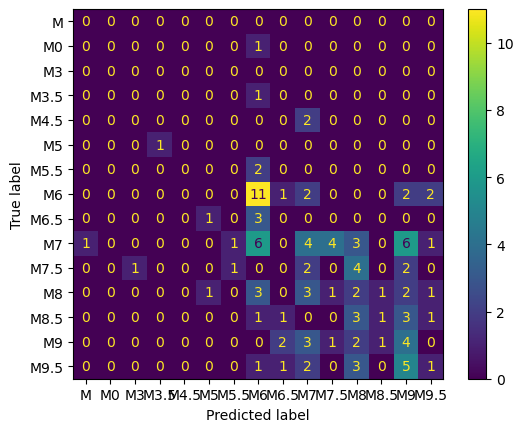

23 / 115 correct


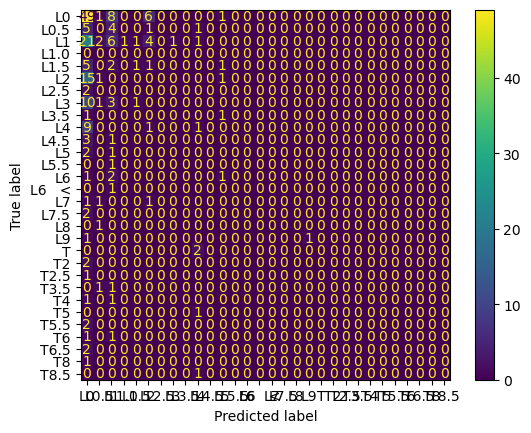

58 / 209 correct


In [79]:
cm = confusion_matrix(y_test_m, y_pred_m)
classes = list(unique_labels(y_test_m, y_pred_m))

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes) 
cm_display.plot()
plt.show()

print("{0} / {1} correct".format(np.sum(y_test_m == y_pred_m), len(y_test_m)))
#print(knn.score(X_test_M, y_test_m))

cm = confusion_matrix(y_test_b, y_pred_b)
classes = list(unique_labels(y_test_b, y_pred_b))

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes) 
cm_display.plot()
plt.show()

print("{0} / {1} correct".format(np.sum(y_test_b == y_pred_b), len(y_test_b)))
#print(knn.score(X_test_B, y_test_b))

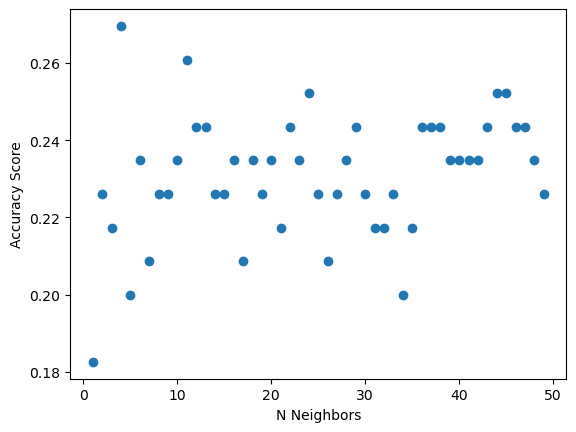

In [77]:
neighbors = np.arange(1,50)
score = []
for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train_M, y_train_m)
    score.append(knn.score(X_test_M, y_test_m))
    #print(n_neighbors, knn.score(X_test, y_test))
    
plt.scatter(neighbors,score)
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy Score')
plt.show()

In [80]:
#What attributes prompt k_neighbors to make the identifications it does? What patterns can be spotted
#in other columns that would drive these choices?

#Random chance of guessing?